<a href="https://colab.research.google.com/github/RiddhiS01/Clustering/blob/main/States'_Health_and_Income_(k_means).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction**

Important indices of a nation's overall progress and prosperity are its healthcare system and regional economies. Comprehending the dynamic relationship between health indices and economic elements in diverse places can provide policymakers with crucial perspectives for optimising resource allocation and executing focused interventions. Our goal in doing this study is to investigate how health and economic situations relate to one another across different states in a nation. By grouping states according to economic and health metrics, we aim to find unique clusters of areas with related features. These clusters can then be used as a foundation for customising policy actions to deal with the unique requirements and difficulties that various regions encounter.

**Problem Statement**

The issue at hand is the requirement to evaluate and classify the economic and health circumstances of various states within a nation. Conventional approaches frequently treat economic and health statistics independently, ignoring any patterns and relationships between these realms. To get over this restriction, we want to perform an integrated analysis that takes economic measures and health indices into account at the same time. Our goal is to find homogenous groups of states with similar characteristics and reveal hidden structures within the data by clustering states based on these combined factors. With the use of this study, we will be better able to comprehend the wide range of economic and health circumstances that exist in the nation and devise targeted policy interventions to close gaps and advance equitable development.

**Goals of the Analysis**
1.	**Exploratory Data Analysis (EDA):** Conducting a comprehensive exploration of the dataset to understand the distribution, characteristics, and interrelationships among various variables.
•	Univariate Analysis
•	Multivariate Analysis

2.	**Performing hierarchical clustering:** Hierarchical clustering is a method of cluster analysis that builds a hierarchy of clusters. We'll use dendrograms to identify the optimal number of clusters.

3.	**Performing K-Means Clustering:** We will apply K-Means clustering in the next step and identify with the help of Elbow curve and Silhouette score the optimum number of clusters. Then we will train our model to identify all the cluster profiles and further present our findings

4.	**Describe cluster profiles and provide policy recommendations:** Analyse the characteristics of each cluster to understand the unique combination of health and economic factors that define them. After that we will use insights from the analysis to provide actionable recommendations for policymakers, tailored to the specific needs and challenges of each cluster of states.


**Data Description**

**Data Columns**

1.	**States:** Names of States
2.	**Health_indeces1:** A composite index rolls several related measures (indicators) into a single score that provides a summary of how the health system is performing in the State.
3.	**Health_indeces2:** A composite index rolls several related measures (indicators) into a single score that provides a summary of how the health system is performing in certain areas of the States.
4.	**Per_capita_income:** Per capita income (PCI) measures the average income earned per person in a given area (city, region, country, etc.) in a specified year. It is calculated by dividing the area's total income by its total population.
5.	**GDP:** GDP provides an economic snapshot of a country/state, used to estimate the size of an economy and growth rate.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
## Read the csv with the dataset
df = pd.read_csv("/content/State_wise_Health_income.csv")

In [3]:
## View the dataset
df

,Unnamed: 0,States,Health_indeces1,Health_indices2,Per_capita_income,GDP
0,0,Bachevo,417,66,564,1823
1,1,Balgarchevo,1485,646,2710,73662
2,2,Belasitsa,654,299,1104,27318
3,3,Belo_Pole,192,25,573,250
4,4,Beslen,43,8,528,22
...,...,...,...,...,...,...
292,292,Greencastle,3443,970,2499,238636
293,293,Greenisland,2963,793,1257,162831
294,294,Greyabbey,3276,609,1522,120184
295,295,Greysteel,3463,847,934,199403


In [4]:
# Check for null values
print(df.isnull().sum())

Unnamed: 0           0
States               0
Health_indeces1      0
Health_indices2      0
Per_capita_income    0
GDP                  0
dtype: int64


In [5]:
# Shape of the dataset
print(df.shape)

(297, 6)


In [6]:
## Column Details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         297 non-null    int64 
 1   States             297 non-null    object
 2   Health_indeces1    297 non-null    int64 
 3   Health_indices2    297 non-null    int64 
 4   Per_capita_income  297 non-null    int64 
 5   GDP                297 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 14.0+ KB


### **Data Preprocessing**

We have dropped the first column ‘Unnamed: 0’ that is a unique id column and not relevant in our analysis.


In [7]:
## Drop unique id column
df.drop('Unnamed: 0',axis = 1, inplace = True)

### **Exploratory Data Analysis**


1.	**Univariate Analysis**

Univariate data refers to a kind of data in which every data point corresponds to a single variable. In other words, it involves the dimension or observation of a single specific or trait for each individual or item in the dataset. It doesn't explore connections between variables or attempt to identify causes. We'll do Descriptive Statistics and Visualizations in Univariate Analysis.


In [8]:
## Descriptive Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Health_indeces1,297.0,2630.151515,2038.505431,-10.0,641.0,2451.0,4094.0,10219.0
Health_indices2,297.0,693.632997,468.944354,0.0,175.0,810.0,1073.0,1508.0
Per_capita_income,297.0,2156.915825,1491.854058,500.0,751.0,1865.0,3137.0,7049.0
GDP,297.0,174601.117845,167167.992863,22.0,8721.0,137173.0,313092.0,728575.0


**Descriptive statistics**, such as measures of central tendency (mean, median, mode) and measures of dispersion (range, standard deviation), are commonly used in the analysis of univariate data.

The above table provides a number of descriptions about the data and can be interpreted as following:

•	Count: Total number of observations in the column.

•	Mean: Average of the observations, for example, on an average, customer satisfaction was 6.198.

•	Std: Standard Deviation, on an average how much an individual observation deviated from the mean, a larger standard deviation means greater variability or dispersion in that variable.

•	Min: Minimum value recorded in the column.

•	25%: 25th percentile or the first quartile, shows that 25% values are below that value.

•	50%: Also, the median of the distribution, this value divides the data into two halves, 50% values lie below and above it.

•	75%: 75th percentile or the third quartile, 75 % of the data lies below this value.

•	Max: The maximum recorded value in the column.


## **Visualizations**
1.	**Histograms:** This is a very common plot to show the nature of the distributions of individual variables. We have used a Kernal Density Plot (KDE) that is laid on the histogram to show the direction and shape of the distribution.


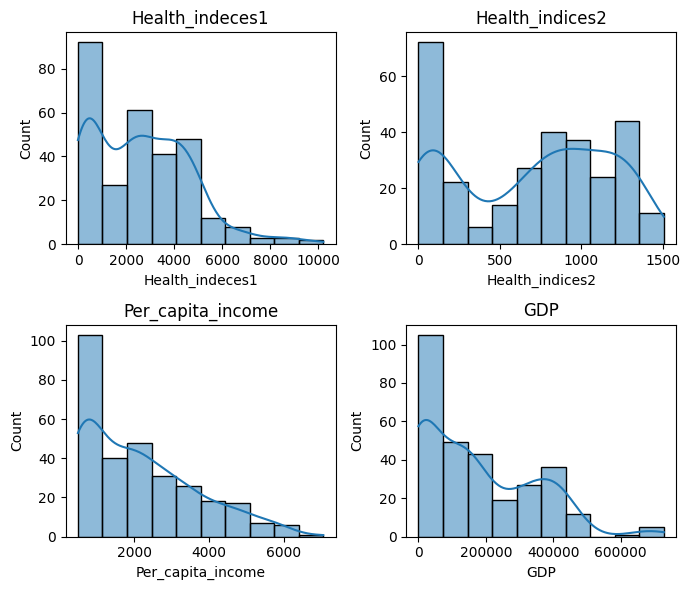

In [9]:
## Plotting the numeric columns in a histplot
plt.figure(figsize = (7,6))
for i,v in enumerate(df.columns[1:]):
  plt.subplot(2,2,i+1)
  sns.histplot(df[v], kde = True)
  plt.title(v)
  plt.tight_layout();

2.	**Boxplots**
Boxplots are used to visualize the measures of descriptive statistics on a plot as well as show any outliers in the distribution. The shape of the boxplot shows how the data is distributed and it also shows any outliers. The box shows the Inter Quartile Range, the box starts with Q1 and goes up till Q3. The line in the centre is median.


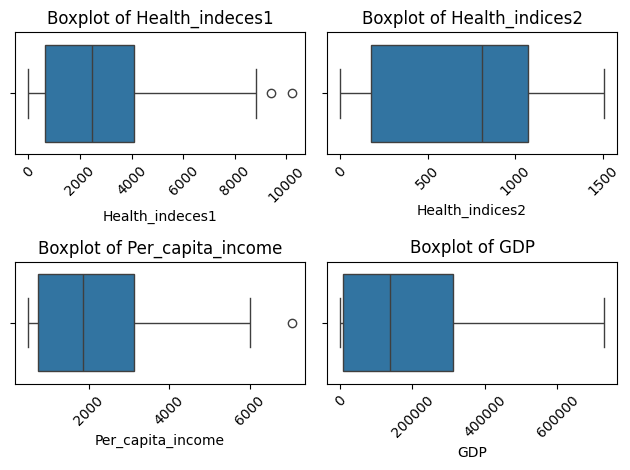

In [10]:
## Boxplot of variables
for i, v in enumerate(df.columns[1:], start=1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=v, data=df)  # Use Seaborn for boxplot
    plt.title('Boxplot of ' + v)
    plt.xticks(rotation=45)
    plt.tight_layout();

**Multivariate Analysis**

Multivariate Analysis encompasses the study of relationship between more than two variables, here we are interested in analysing the impact of multiple independent variables on a dependent variable.  A scatter plot, in which one variable is plotted on the x-axis and the other on the y-axis, is the most widely used visual aid for this analysis. Correlation coefficient and heatmaps are commonly used in addition to scatter plots to examine the relationship between the variables.


**•	Correlation Analysis and Scatter plot**

Correlation tells us the strength and direction of the linear relationship between two variables. It can be in both negative and positive directions and the correlation coefficient that ranges from -1 to 1 tells us the strength of the relationship. For example, a correlation close to +1 means strong direct relationship between the two variables and a value close to -1 means strong inverse relationship between two variables. It gives us an idea about how strongly both variables are related to each other to work on further analysis.


In [11]:
## correlation analysis of numeric columns
df.corr(numeric_only= True)

,Health_indeces1,Health_indices2,Per_capita_income,GDP
Health_indeces1,1.000000,0.866403,0.668632,0.906999
Health_indices2,0.866403,1.000000,0.811553,0.869385
Per_capita_income,0.668632,0.811553,1.000000,0.629395
GDP,0.906999,0.869385,0.629395,1.000000


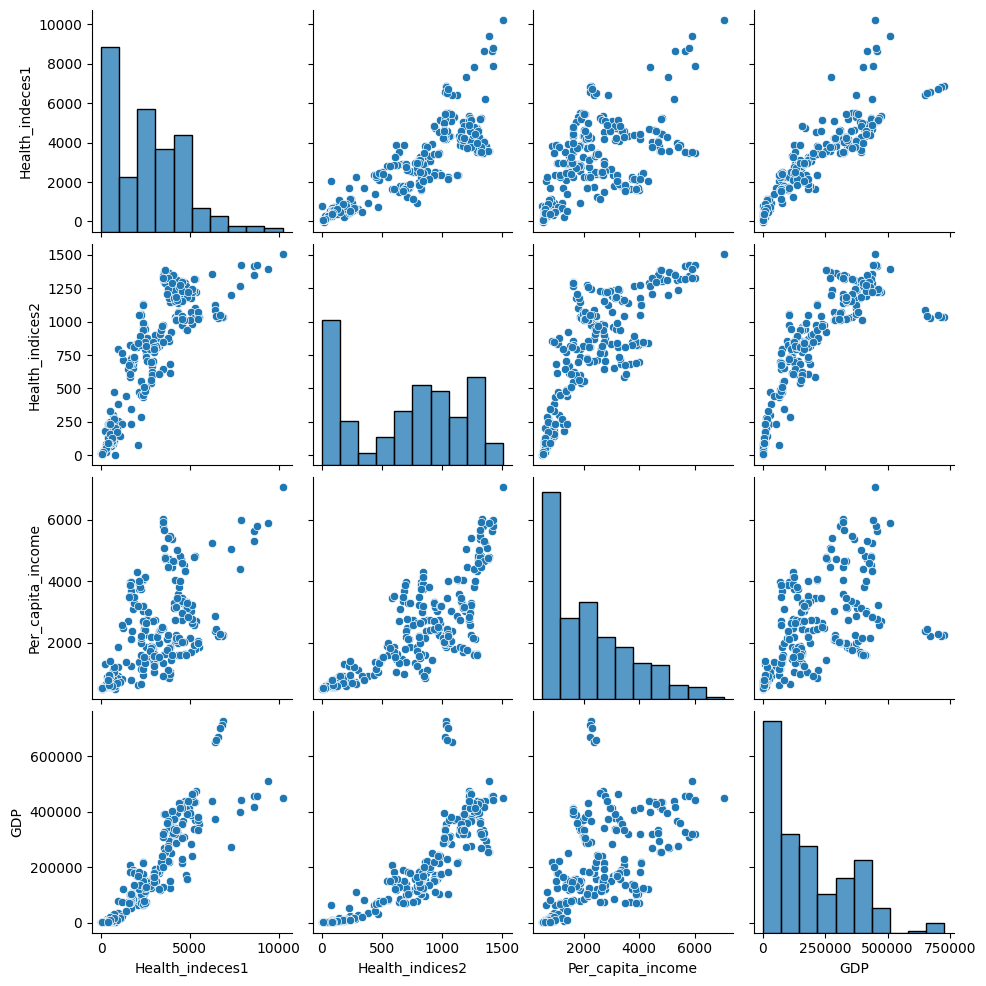

In [12]:
## Plot the scatter plot for variables
sns.pairplot(df.select_dtypes(include='number'));

**Inferences from above analysis**

•	Health_indices1 and Health_indices2 exhibit a strong positive correlation of 0.866, suggesting that these two composite health indices are closely related and tend to increase or decrease together.

•	Similarly, GDP shows a strong positive correlation with both Health_indeces1 (0.907) and Health_indices2 (0.869), indicating that higher GDP is associated with better health outcomes.

•	Per capita income also demonstrates moderate positive correlations with health indices and GDP, with coefficients ranging from 0.629 to 0.812.

These findings suggest interdependencies between health and economic indicators, highlighting the importance of addressing both aspects concurrently for comprehensive policy planning and development strategies aimed at improving overall well-being.


### Necessity of scaling the data for clustering in this case

Scaling is necessary for clustering when the features are on different scales. In this case, we have health indices, per capita income, and GDP, which are on different scales. Therefore, scaling is necessary to ensure that all features contribute equally to the clustering process.



In [13]:
from sklearn.preprocessing import StandardScaler

# Separate features from the target variable (States)
X = df.drop(columns=['States'])

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Applying hierarchical clustering to scaled data. Identifying the number of optimum clusters using Dendrogram and briefly describe them.

Hierarchical clustering is a method of cluster analysis that builds a hierarchy of clusters. We'll use dendrograms to identify the optimal number of clusters.

**Identify optimum clusters:**The number of clusters can be determined using a dendrogram, which visually represents the hierarchical clustering process. We identify the optimal number of clusters by looking for the tallest vertical line in the dendrogram that does not intersect any other lines.

**Description of clusters:** After identifying the optimal number of clusters, we assign cluster labels to the data points and describe the characteristics of each cluster based on the features present in the dataset.


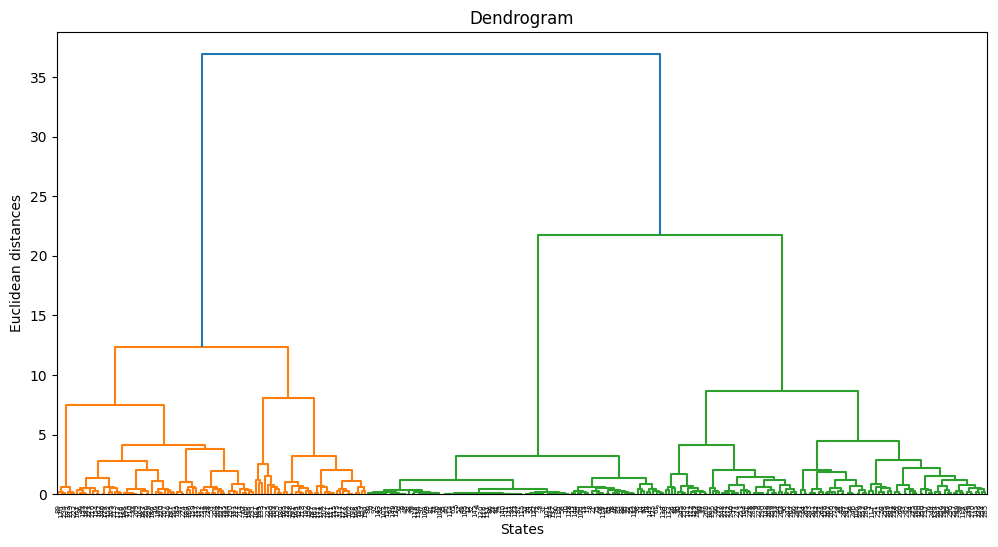

In [14]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering
Z = linkage(X_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('States')
plt.ylabel('Euclidean distances');

The horizontal dotted line in the middle intersecting 3 vertical lines indicate that we selected 3 clusters based on the hierarchical clustering dendrogram. The dendrogram visually displays the hierarchical relationships between data points and clusters. To determine the optimal number of clusters, we examined the dendrogram and identified the point where the largest vertical distance (Euclidean distance) was observed without significant merging of clusters. This point indicated a natural break in the hierarchy, suggesting that 3 clusters would capture meaningful structure in the data. As a result, we proceeded with 3 clusters for further analysis.

### Applying K-Means clustering on scaled data and determining optimum clusters. Also, utilizing elbow curve and the silhouette score for the same.

K-Means is a popular clustering algorithm that partitions data into K clusters by iteratively assigning each data point to the nearest centroid and updating the centroids based on the mean of data points assigned to each cluster. We have applied clustering on our scaled data in order to identify possible clusters. We have created a range of initial predetermined clusters, ranging from 2 to 10, from these we will try to find optimum clusters for our analysis.



**Applying Elbow Curve and Silhouette Score to determine optimum clusters:**

We use the elbow method and silhouette score to determine the optimal number of clusters for K-Means clustering. The elbow method looks for the point where the rate of decrease in inertia (within-cluster sum of squares) slows down significantly. The silhouette score measures the separation between clusters, with higher scores indicating better-defined clusters.

The point of the elbow method is to identify the optimal number of clusters by finding the point where the rate of decrease in inertia (within-cluster sum of squares) slows down significantly. This point is often referred to as the "elbow point.


In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

## Define range of clusters
k_values = range(2,11)
inertia_values = []
silhouette_scores = []

## Fit K-Means for each value of k
for k in k_values:
  kmeans = KMeans(n_clusters = k, init="k-means++",random_state = 45)  ## we are using KMeans++ here to find the centroid
  kmeans.fit(X_scaled)

  ## Calculate inertia (within-cluster sum of squares) for the current k
  inertia_values.append(kmeans.inertia_)

  ## Calculate silhouette score for the current k
  silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

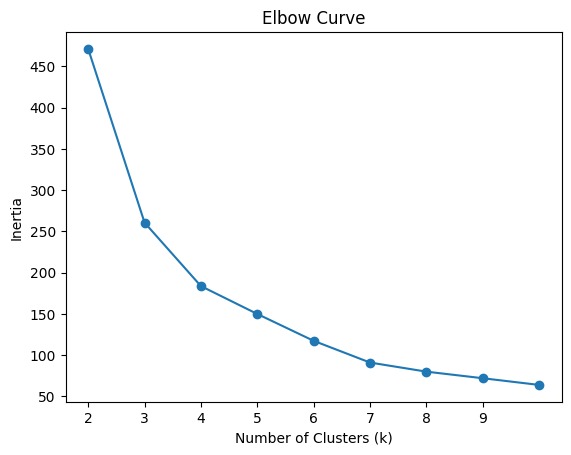

In [16]:
# Plot the elbow curve
# plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(2, len(k_values)+1))
plt.show()

•	As the number of clusters increases, the inertia generally decreases, as each cluster has fewer data points to account for.

•	However, at some point, adding more clusters does not lead to a significant reduction in inertia. This is the point where the elbow occurs.

•	The optimal number of clusters can be chosen at the point where the inertia starts to decrease at a slower rate, forming an "elbow" in the curve. This point suggests that adding more clusters does not explain much more of the variance in our data, hence indicating the optimal number of clusters.

•	From the above curve we can see after 3 or 4 clusters the rate of decrease is rather low and is not leading to significant reduction in inertia.

Now, to determine optimum number we will also check Silhouette scores to arrive at the final number of optimum clusters.


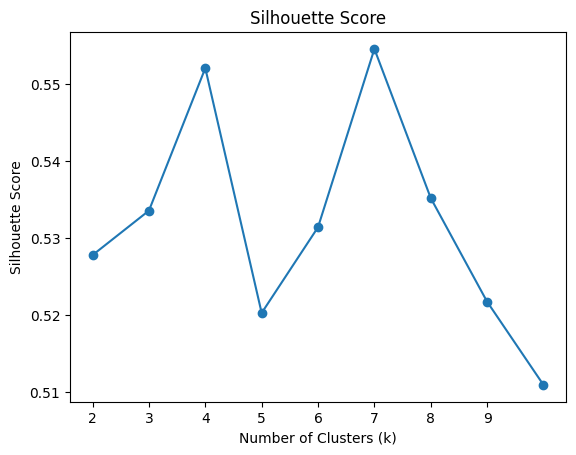

In [17]:
# Plot silhouette scores
# plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(range(2,len(k_values)+1))
plt.show()


**Interpretation of Scores**

Each silhouette score falls within the range of [-1, 1], where:

•	A score close to +1 indicates that the object is well-clustered and lies far from neighbouring clusters.

•	A score close to 0 indicates that the object is close to the decision boundary between two neighbouring clusters.

•	A score close to -1 indicates that the object may have been assigned to the wrong cluster.

Based on the silhouette scores, the highest score seems to be around 0.55. This indicates relatively good separation between clusters, suggesting that the clustering configuration corresponding to this silhouette score may be optimal.

To determine the optimal number of clusters, we would typically choose the number of clusters corresponding to the highest silhouette score but in our case the logic of distribution of per-capita income suggests that data should be divided into 3 clusters namely- low income, middle income and high income.

In this case, it seems like the optimal number of clusters should be 3 which is also confirmed by Dendrogram and Elbow curve. Cluster 3 is associated with the silhouette score of approximately 0.53. Therefore, we will consider using 3 clusters for our analysis.


### Description of cluster profiles for the clusters defined.

In [31]:
## Train the Clustering Model
from sklearn.cluster import KMeans

## Define the number of clusters
n_clusters = 3

## Select the features for clustering
X = df[['Health_indeces1', 'Health_indices2', 'Per_capita_income', 'GDP']]

## Initialize KMeans clustering object
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

## Fit the model to the data and predict cluster labels
X['Cluster'] = kmeans.fit_predict(X)

## Calculate cluster means for each feature
cluster_profiles = X.groupby('Cluster').mean()

# Display cluster profiles
print("Cluster Profiles:")
print(cluster_profiles)



Cluster Profiles:
         Health_indeces1  Health_indices2  Per_capita_income            GDP
Cluster                                                                    
0            2872.947368       853.347368        2660.221053  163159.147368
1             678.784483       181.724138         918.655172   17617.336207
2            4994.023256      1207.686047        3271.151163  398986.069767


The above output shows the Cluster Profiles obtained from K-Means Clustering, we have formed 3 cluster groups Cluster 0,1 and 2. They represent different groups based on differences in Per capita income, GDP and health indices.

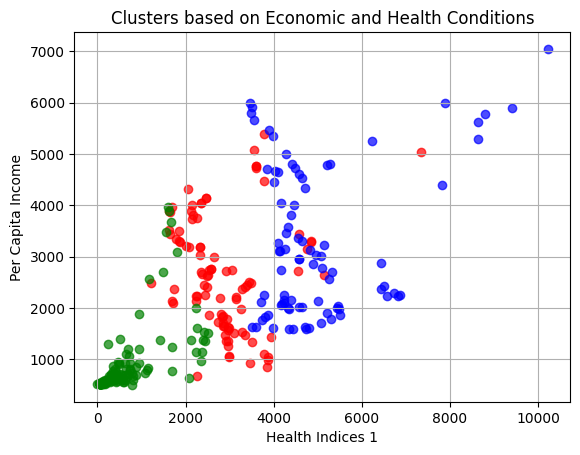

In [33]:
## Plot the clusters on a scatter plot
## Define colors for each cluster
colors = ['red', 'green','blue']

## Iterate over each cluster and plot its data points
for cluster in range(n_clusters):
    cluster_data = X[X['Cluster'] == cluster]
    plt.scatter( cluster_data['Health_indeces1'], cluster_data['Per_capita_income'], c=colors[cluster], alpha=0.7)

plt.xlabel('Health Indices 1')
plt.ylabel('Per Capita Income')
plt.title('Clusters based on Economic and Health Conditions')
plt.grid(True);

The above scatter plot shows the clusters that we formulated through K-Means clustering. The axes show Per Capita Income and Health Indices 1 and the respective clusters formed on the basis of these columns. The red coloured points are Low income – Low health index group, blue are Middle income – Middle health index group and green are High Income – High health index group.

Description of Cluster Profiles
We calculate summary statistics for each cluster, such as mean values of features, to understand the characteristics of each cluster. This helps in identifying patterns and differences between clusters.

**•	Cluster 0 (Moderate health and income) Green:**
States in this cluster exhibit moderate to high health indices and per capita income, with a relatively strong GDP. These states are likely characterized by above-average economic development and health outcomes.

**•	Cluster 1 (Low health and income) Red:**
States in this cluster have low health indices and per capita income, indicating lower economic development and health outcomes compared to other clusters. Priority should be given to addressing economic disparities and improving access to healthcare services in these states.

**•	Cluster 2 (High health and income) Blue:**
States in this cluster demonstrate high health indices and per capita income, along with a robust GDP. These states represent regions with superior economic development and health outcomes, requiring targeted strategies to sustain growth and address specific challenges related to healthcare access and quality.




### Recommending different priority based actions that need to be taken for different clusters on the bases of their vulnerability situations according to their Economic and Health Conditions.

Based on the characteristics of each cluster, we provide recommendations for priority actions that need to be taken. These recommendations can be tailored to address the specific vulnerabilities and needs of each cluster, considering economic and health conditions.

• **Cluster 0 (Moderate health and income):**
Strengthen healthcare infrastructure and services to maintain and improve health outcomes.

Implement programs to support economic growth and diversification, focusing on key sectors contributing to GDP.

•	**Cluster 1 (Low health and income):**
Prioritize investments in healthcare facilities and resources to address healthcare disparities and improve health outcomes.

Implement targeted economic development initiatives to stimulate growth and increase per capita income in disadvantaged areas.

**•	Cluster 2 (High health and income):**
Enhance public health initiatives and preventive care programs to sustain high health indices and improve overall well-being.

Support innovation and entrepreneurship to further boost economic prosperity and ensure inclusive growth across all segments of the population.

These recommendations are tailored to the unique characteristics and needs of each cluster, aiming to address vulnerabilities and promote sustainable development in different regions.
